Le but de ce notebook est de tester une méthode de résolution naïve avec des conditions. \
Elle a pour but d'être simple et de tester principalement l'environnement de travail pour pouvoir ensuite tester des méthodes plus complexes comme le SARSA, des DNN et bien d'autres.

## 1. Importation des librairies

In [1]:
import gymnasium as gym # environnement.
from tools import * # fonctions utiles.

## 2. Création de l'environnement

In [2]:
# Crée l'environnement blackjack.
# natural = True : Si le joueur fait 21 avec deux cartes (As + 10), il obtient une reward plus élevée.
# sab = True : natural est ignoré (reward de 1 même si 21 avec deux cartes) et si le joueur ainsi que le croupier font 21, il s'agira d'un match nul.
env = gym.make('Blackjack-v1', natural=False, sab=True)

## 3. Test de la fonction de résolution

In [3]:
# Paramètres pour le test.
total_episodes = 1_000_000
total_win = 0
total_loose = 0
total_draw = 0

for episode in range(total_episodes):

    # Début de notre environnement pour le résoudre.
    depart = env.reset()[0]
    action = resolve_blackjack(depart) # Méthode dans le fichier tools.py
    observation, reward, done, _, _ = env.step(action)

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = resolve_blackjack(observation)
        observation, reward, done, _, _ = env.step(action)

    # Compréhension du résultat du jeu.
    if reward == 1:
        total_win += 1
    elif reward == -1:
        total_loose += 1
    else:
        total_draw += 1

env.close()

## 4. Interprétation des résultats

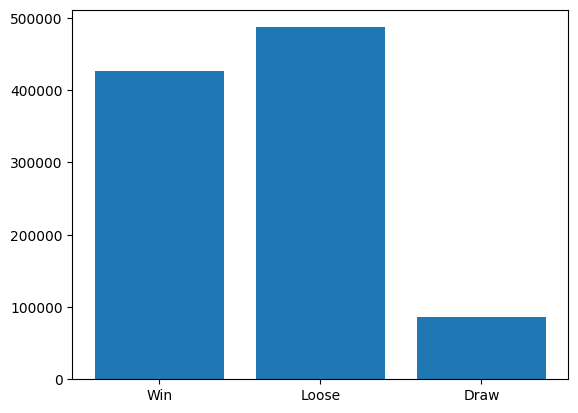

Win : 42.6384 %
Loose : 48.6985 %
Draw : 8.6631 %


In [4]:
barplot(total_win, total_loose, total_draw, total_episodes) # Voir fichier tools.py